## <center>Bike Sharing Assignment </center>


### <font color='darkgreen'>Introduction</font>

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

### <font color='darkgreen'>Problem Statement</font>

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


### <font color='darkgreen'>Goal</font>

The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Above information will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

#### <font color='darkgreen'>Prepared by</font> 
##### <font color='darkgreen'>Bibhuti Ranjan Sinha</font> 





In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#libraries for data reading and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

#stats and LR libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


#utility
from IPython.display import Markdown, display, display_html
from itertools import chain,cycle

<br/>
<br/>

### <font color='darkgreen'>Reading and Understanding the data</font>

In [2]:
# Reading and loading the dataset
df_bikeShare = pd.read_csv('day.csv')

In [3]:
df_bikeShare.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
# Rows and Column in dataset
shape = df_bikeShare.shape
print("Number of Rows:", shape[0],"\nNumber of Column:", shape[1])

Number of Rows: 730 
Number of Column: 16


In [5]:
df_bikeShare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df_bikeShare.describe() 

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [7]:
# Finding out the column wise missing values in Percentage
missingColumnValueInPercentage = (df_bikeShare.isna().sum()/shape[0]*100).round(2)
missingColumnValueInPercentage.sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

##### Data understanding summary
- Number of Rows: 730 
- Number of Column: 16 
- No Missing values
- Except [dteday] all columns are either in Int or Float
- [instant] column is index column, we can delete that column as that will not serve any purpose
- We have categorical variable as well but the data is in Integer format

<br/>
<br/>

### <font color='darkgreen'>Data Cleaning</font>

In [8]:
# Let's remove the unwanted column which will not serve any purpose
# instant - This column just contains row index, good to drop
# dteday - As we already have yr, mnth, workingday and weekday column for any date related prediction, good to delete dteday
# casual and registered -  As our target variable is cnt which is equal to casual + registered, both column are good to drop

df_bikeShare.drop(['instant','dteday','casual','registered'],axis=1, inplace = True)

In [9]:
#let's now checkout for duplicate rows and remove those if any
df_bikeShare.drop_duplicates(subset=None, inplace=True)

In [10]:
#verify the shape after duplicate treatment
df_bikeShare.shape

(730, 12)

In [11]:
#Looks like data set doesn't had any duplicates rows

In [12]:
#let's rename abbreviated columns names
df_bikeShare.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace=True)

In [13]:
df_bikeShare.head()

season  year  month  holiday  weekday  workingday  weathersit       temp  \
0       1     0      1        0        6           0           2  14.110847   
1       1     0      1        0        0           0           2  14.902598   
2       1     0      1        0        1           1           1   8.050924   
3       1     0      1        0        2           1           1   8.200000   
4       1     0      1        0        3           1           1   9.305237   

      atemp  humidity  windspeed  count  
0  18.18125   80.5833  10.749882    985  
1  17.68695   69.6087  16.652113    801  
2   9.47025   43.7273  16.636703   1349  
3  10.60610   59.0435  10.739832   1562  
4  11.46350   43.6957  12.522300   1600

Now let's change the numerical categorical variables values to meaningful values based on data dictinary, which will later help to create meanningful dummy variables

In [14]:
df_bikeShare.season = df_bikeShare.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df_bikeShare.month = df_bikeShare.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',
                                             6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df_bikeShare.weekday = df_bikeShare.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df_bikeShare.weathersit = df_bikeShare.weathersit.map({1:'clear',2:'mist',3:'light_snow_rain',4:'heavy_snow_rain'})

In [15]:
df_bikeShare.head()

season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     sat           0       mist  14.110847   
1  spring     0   jan        0     sun           0       mist  14.902598   
2  spring     0   jan        0     mon           1      clear   8.050924   
3  spring     0   jan        0     tue           1      clear   8.200000   
4  spring     0   jan        0     wed           1      clear   9.305237   

      atemp  humidity  windspeed  count  
0  18.18125   80.5833  10.749882    985  
1  17.68695   69.6087  16.652113    801  
2   9.47025   43.7273  16.636703   1349  
3  10.60610   59.0435  10.739832   1562  
4  11.46350   43.6957  12.522300   1600

In [16]:
df_bikeShare.weathersit.value_counts()

weathersit
clear              463
mist               246
light_snow_rain     21
Name: count, dtype: int64

<br/>
<br/>

### <font color='darkgreen'>Data Visualization</font>

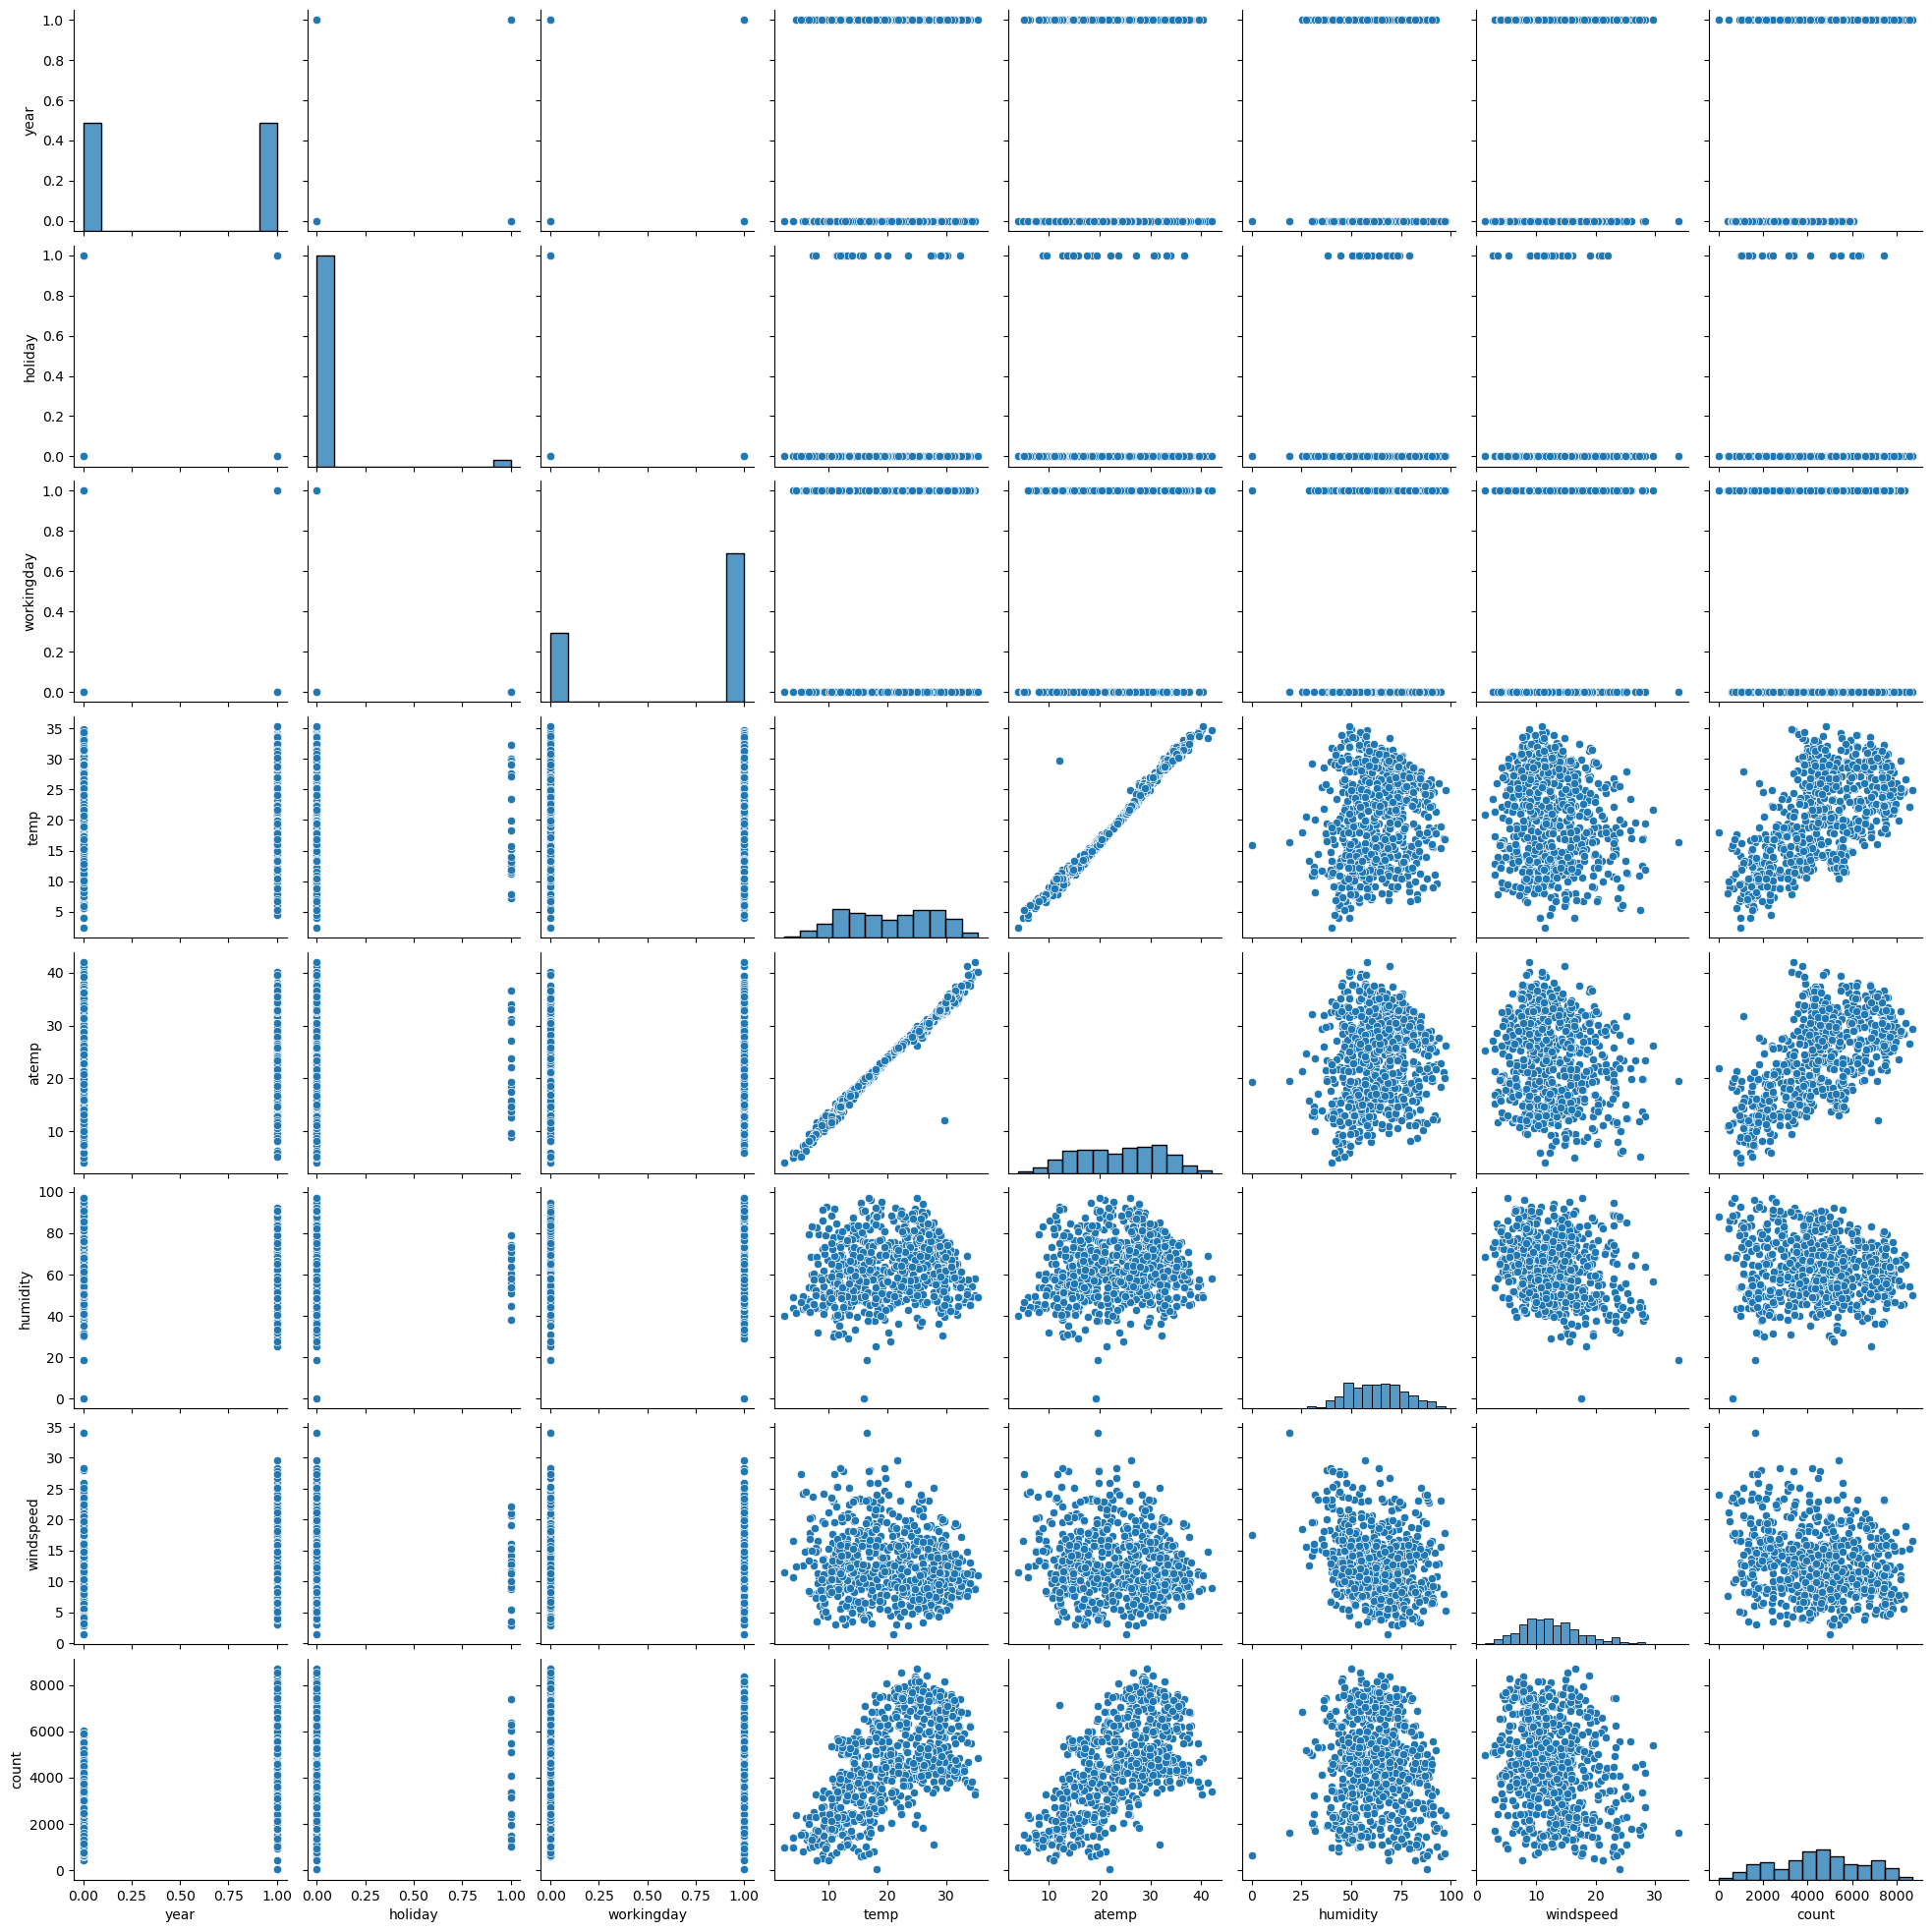

In [17]:
#Let's make a pairplot of all the numeric variables
sns.pairplot(df_bikeShare)
plt.show()

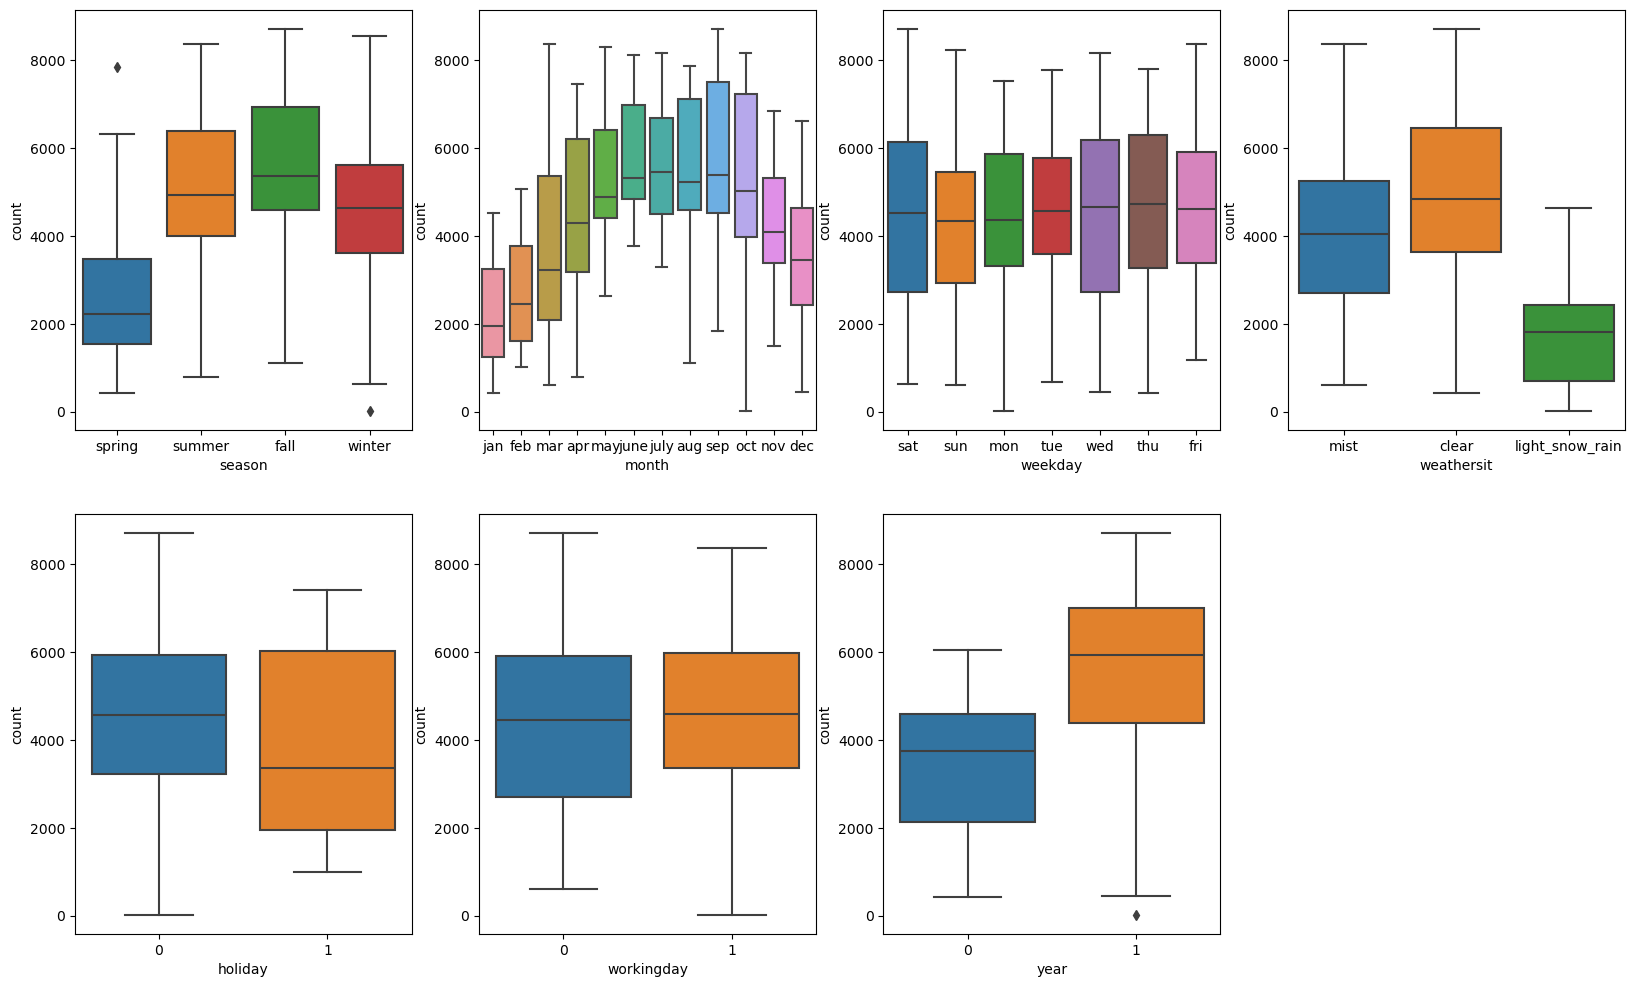

In [18]:
#Now let's visualize the categorical variables and compare against target variable
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'count', data = df_bikeShare)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'count', data = df_bikeShare)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'count', data = df_bikeShare)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'count', data = df_bikeShare)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'count', data = df_bikeShare)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'count', data = df_bikeShare)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'count', data = df_bikeShare)
plt.show()

<Figure size 1500x3000 with 0 Axes>

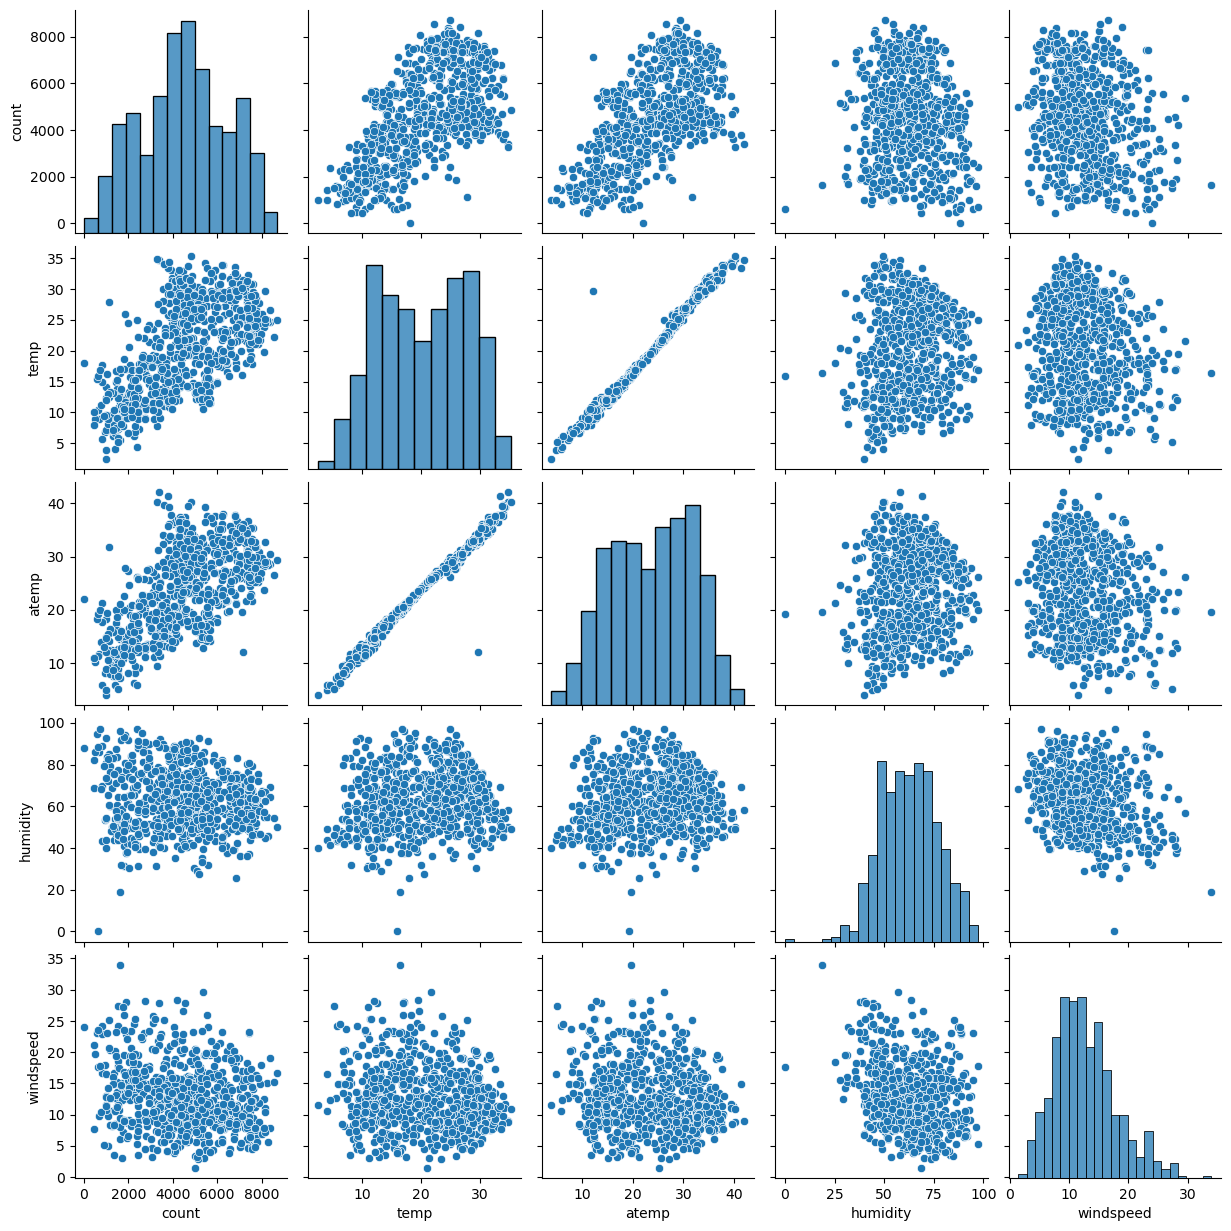

In [19]:
plt.figure(figsize = (15,30))
sns.pairplot(data=df_bikeShare,vars=['count', 'temp', 'atemp', 'humidity','windspeed'])
plt.show()

In [20]:
fig = px.scatter(df_bikeShare, x="temp", y="count", trendline="ols", title='Temperature v/s Count',
                 labels={'temp':'Temperature','count':'Count'})
fig.show()

######  Inference:
- Demand for bikes is positively correlated to temperature.
- We can see that count is linearly increasing with temp indicating linear relation.

In [21]:
fig = px.scatter(df_bikeShare, x="humidity", y="count", trendline="ols", title='Humidity v/s Count',
                 labels={'humidity':'Humidity','count':'Count'})
fig.show()

######  Inference:
- Humidity is values are more scattered around.
- Although we can see count decreasing with increase in humidity.

In [22]:
fig = px.scatter(df_bikeShare, x="windspeed", y="count", trendline="ols", title='Windspeed v/s Count',
                 labels={'windspeed':'Windspeed','count':'Count'})
fig.show()

######  Inference:
- Windspeed is values are more scattered around.
- Although we can see cnt decreasing with increase in windspeed.

In [23]:
fig = px.scatter(df_bikeShare, x="atemp", y="count", trendline="ols", title='Feeling Temperature v/s Count',
                 labels={'atemp':'Feeling Temperature','count':'Count'})
fig.show()

######  Inference:
- Demand for bikes is positively correlated to feeling temperature.
- We can see that count is linearly increasing with feeling temperature indicating linear relation.

In [24]:
# let's check continuous variables relationship with each other
fig = px.imshow(df_bikeShare[['temp','atemp','humidity','windspeed','count']].corr(), text_auto=True, aspect="auto")
fig.show()

##### Data Visualization summary
- Season <i>fall</i> has highest demand for rental bikes
- Data shows second year demand is more than first year 
- The clear weathershit has highest demand
- More demand in holiday 
- Not able to infer anything from weekday data
- Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
- During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions

<br/>
<br/>

### <font color='darkgreen'>Data Preparation</font>

In [25]:
#let's create the dummy variable for all categorical variable
#Dropping the first columns as (p-1) dummies can explain p categories.

#In weathersit first column was not dropped so as to not lose the info about severe weather situation.

months_df=pd.get_dummies(df_bikeShare.month,drop_first=True,dtype=int)
weekdays_df=pd.get_dummies(df_bikeShare.weekday,drop_first=True,dtype=int)
seasons_df=pd.get_dummies(df_bikeShare.season,drop_first=True,dtype=int)
weathersit_df=pd.get_dummies(df_bikeShare.weathersit,dtype=int)

In [26]:
weekdays_df

mon  sat  sun  thu  tue  wed
0      0    1    0    0    0    0
1      0    0    1    0    0    0
2      1    0    0    0    0    0
3      0    0    0    0    1    0
4      0    0    0    0    0    1
..   ...  ...  ...  ...  ...  ...
725    0    0    0    1    0    0
726    0    0    0    0    0    0
727    0    1    0    0    0    0
728    0    0    1    0    0    0
729    1    0    0    0    0    0

[730 rows x 6 columns]

In [27]:
# Merging  the dataframe, with the dummy variable dataset. 
df_bikeShare1 = pd.concat([df_bikeShare,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [28]:
df_bikeShare1.head()

season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     sat           0       mist  14.110847   
1  spring     0   jan        0     sun           0       mist  14.902598   
2  spring     0   jan        0     mon           1      clear   8.050924   
3  spring     0   jan        0     tue           1      clear   8.200000   
4  spring     0   jan        0     wed           1      clear   9.305237   

      atemp  humidity  ...  sun  thu  tue  wed  clear  light_snow_rain  mist  \
0  18.18125   80.5833  ...    0    0    0    0      0                0     1   
1  17.68695   69.6087  ...    1    0    0    0      0                0     1   
2   9.47025   43.7273  ...    0    0    0    0      1                0     0   
3  10.60610   59.0435  ...    0    0    1    0      1                0     0   
4  11.46350   43.6957  ...    0    0    0    1      1                0     0   

   spring  summer  winter  
0       1       0       0  
1       1       0       0  
2       1       0       0  
3       1       0       0  
4       1       0       0  

[5 rows x 35 columns]

In [29]:
df_bikeShare1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           730 non-null    object 
 1   year             730 non-null    int64  
 2   month            730 non-null    object 
 3   holiday          730 non-null    int64  
 4   weekday          730 non-null    object 
 5   workingday       730 non-null    int64  
 6   weathersit       730 non-null    object 
 7   temp             730 non-null    float64
 8   atemp            730 non-null    float64
 9   humidity         730 non-null    float64
 10  windspeed        730 non-null    float64
 11  count            730 non-null    int64  
 12  aug              730 non-null    int32  
 13  dec              730 non-null    int32  
 14  feb              730 non-null    int32  
 15  jan              730 non-null    int32  
 16  july             730 non-null    int32  
 17  june            

In [30]:
# let's drop unnecessary columns as we have already created dummy variable.
df_bikeShare1.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [31]:
df_bikeShare1.head()

year  holiday  workingday       temp     atemp  humidity  windspeed  count  \
0     0        0           0  14.110847  18.18125   80.5833  10.749882    985   
1     0        0           0  14.902598  17.68695   69.6087  16.652113    801   
2     0        0           1   8.050924   9.47025   43.7273  16.636703   1349   
3     0        0           1   8.200000  10.60610   59.0435  10.739832   1562   
4     0        0           1   9.305237  11.46350   43.6957  12.522300   1600   

   aug  dec  ...  sun  thu  tue  wed  clear  light_snow_rain  mist  spring  \
0    0    0  ...    0    0    0    0      0                0     1       1   
1    0    0  ...    1    0    0    0      0                0     1       1   
2    0    0  ...    0    0    0    0      1                0     0       1   
3    0    0  ...    0    0    1    0      1                0     0       1   
4    0    0  ...    0    0    0    1      1                0     0       1   

   summer  winter  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0  

[5 rows x 31 columns]

In [32]:
df_bikeShare1.shape

(730, 31)

In [33]:
corr = df_bikeShare1.corr()
#Draw Heatmap of correlation
fig = px.imshow(corr, text_auto=True)
fig.update_layout(width=900,height=900)
fig.show()

<br/>
<br/>

### <font color='darkgreen'>Model Building</font>

##### Splitting the Data into Training and Testing Sets

In [34]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

#Splitting the Data into Training and Testing Sets
df_train, df_test = train_test_split(df_bikeShare1, train_size = 0.7, random_state = 100)

In [35]:
# check the shape of training datatset
df_train.shape

(510, 31)

In [36]:
# check the shape of testing datatset
df_test.shape

(220, 31)

##### Rescaling the Features using MinMax Scaler

In [37]:
# Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

In [38]:
# Apply scaler() to all the columns except the '0,1' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [39]:
df_train.head()

year  holiday  workingday      temp     atemp  humidity  windspeed  \
576     1        0           1  0.815169  0.766351  0.725633   0.264686   
426     1        0           0  0.442393  0.438975  0.640189   0.255342   
728     1        0           0  0.245101  0.200348  0.498067   0.663106   
482     1        0           0  0.395666  0.391735  0.504508   0.188475   
111     0        0           1  0.345824  0.318819  0.751824   0.380981   

        count  aug  dec  ...  sun  thu  tue  wed  clear  light_snow_rain  \
576  0.827658    0    0  ...    0    0    1    0      1                0   
426  0.465255    0    0  ...    0    0    0    0      0                0   
728  0.204096    0    1  ...    1    0    0    0      1                0   
482  0.482973    0    0  ...    0    0    0    0      0                0   
111  0.191095    0    0  ...    0    0    0    0      0                0   

     mist  spring  summer  winter  
576     0       0       0       0  
426     1       1       0       0  
728     0       1       0       0  
482     1       0       1       0  
111     1       0       1       0  

[5 rows x 31 columns]

In [40]:
df_train.describe()

year     holiday  workingday        temp       atemp    humidity  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537440    0.513156    0.650480   
std      0.500429    0.157763    0.468282    0.225858    0.212410    0.145846   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.542596    0.529718    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed       count         aug         dec  ...         sun  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.320883    0.513499    0.096078    0.084314  ...    0.143137   
std      0.169803    0.224421    0.294988    0.278131  ...    0.350557   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.199179    0.356420    0.000000    0.000000  ...    0.000000   
50%      0.296763    0.518638    0.000000    0.000000  ...    0.000000   
75%      0.414447    0.684710    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              thu         tue         wed       clear  light_snow_rain  \
count  510.000000  510.000000  510.000000  510.000000       510.000000   
mean     0.133333    0.131373    0.158824    0.625490         0.029412   
std      0.340268    0.338139    0.365870    0.484471         0.169124   
min      0.000000    0.000000    0.000000    0.000000         0.000000   
25%      0.000000    0.000000    0.000000    0.000000         0.000000   
50%      0.000000    0.000000    0.000000    1.000000         0.000000   
75%      0.000000    0.000000    0.000000    1.000000         0.000000   
max      1.000000    1.000000    1.000000    1.000000         1.000000   

             mist      spring      summer      winter  
count  510.000000  510.000000  510.000000  510.000000  
mean     0.345098    0.243137    0.247059    0.247059  
std      0.475867    0.429398    0.431725    0.431725  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      1.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 31 columns]

In [41]:
# Let's check the correlation coefficients to see which variables are highly correlated
fig = px.imshow(df_train.corr(), text_auto=True)
fig.update_layout(width=900,height=900)
fig.show()

Count seems to have correlation with Year variable and Temperature.



##### Features selection using RFE



In [42]:
# Building the Linear Model

y_train = df_train.pop('count')
X_train = df_train

In [43]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 510 entries, 576 to 520
Series name: count
Non-Null Count  Dtype  
--------------  -----  
510 non-null    float64
dtypes: float64(1)
memory usage: 8.0 KB


In [44]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [45]:
#Cutting down number of features to 15 using automated approach
rfe = RFE(estimator=lm, n_features_to_select=15)

In [46]:
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [47]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 8),
 ('dec', False, 2),
 ('feb', False, 5),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 15),
 ('mar', False, 16),
 ('may', False, 6),
 ('nov', True, 1),
 ('oct', False, 14),
 ('sep', True, 1),
 ('mon', False, 10),
 ('sat', False, 3),
 ('sun', False, 9),
 ('thu', False, 12),
 ('tue', False, 11),
 ('wed', False, 13),
 ('clear', True, 1),
 ('light_snow_rain', True, 1),
 ('mist', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1)]

In [48]:
# selecting the selected variable via RFE in col list
selected_column=X_train.columns[rfe.support_]
selected_column

Index(['year', 'holiday', 'temp', 'atemp', 'humidity', 'windspeed', 'jan',
       'july', 'nov', 'sep', 'clear', 'light_snow_rain', 'mist', 'spring',
       'winter'],
      dtype='object')

In [49]:
# checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['workingday', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed', 'summer'],
      dtype='object')

In [50]:
P_VALUE = 0.05
VIF = 5

#Function to display  ols summary with calculated VIF
def display_side_by_side(vifDataFrame,olsSummary):
    html_str=''
    html_str+='<th style="text-align:center"><td style="vertical-align:top">'
    html_str+=olsSummary.tables[0].as_html()
    html_str+=olsSummary.tables[2].as_html()
    html_str+='</td></th>'
    html_str+='<th style="text-align:center"><td style="vertical-align:top">'
    html_str+=vifDataFrame.to_html().replace('table','table style="display:inline"')
    html_str+='</td></th>'
    html_str+='<th style="text-align:center"><td style="vertical-align:top">'
    html_str+=olsSummary.tables[1].as_html()
    html_str+='</td></th>'
    display_html(html_str,raw=True)

#Function to build a model using statsmodel api
def get_model(X_train_selected):
    X_train_lm = sm.add_constant(X_train_selected)
    lr = sm.OLS(y_train,X_train_lm).fit()
    return lr,X_train_lm

#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(X_train_rfe):
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    return vif.sort_values(by='VIF',ascending=False)

#Function which will recusively 
def build_model(X_train_selected):
    build=True
    model = 1
    while build:
        lr_model , X_train_lm = get_model(X_train_selected)
        vif = get_vif(X_train_selected)
        display_html(f'<h4 style="text-align: center;">Model-{model} : OLS Summary with VIF</h2>',raw=True)
        display_side_by_side(vif,lr_model.summary())
        pvalues = pd.DataFrame({
            'pvalue': round(lr_model.pvalues,4),
            'name': lr_model.params.index
        }).sort_values(by='pvalue', ascending=False)
        highPValues = pvalues[pvalues['pvalue'] >= P_VALUE]
        highVIF = vif[vif['VIF'] > VIF]
        if highPValues.empty and highVIF.empty:
            fig = px.imshow(X_train_selected.corr(), text_auto=True)
            fig.update_layout(width=900,height=900)
            fig.show()
            display(Markdown("Here VIF seems to be almost accepted, p-value for all the features is almost 0.0, R2 is"+ 
                             " "+str(round(lr_model.rsquared,4))+" and Adjusted R2 is "+str(round(lr_model.rsquared_adj,4))+
                             " We can select Model-"+str(model)+" as our final as it has all important statistics "+
                             "high (R-square, Adjusted R-squared and F-statistic), along with no insignificant "+
                             "variables and no multi coliinear (high VIF) variables. Difference between R-squared "+
                             "and Adjusted R-squared values for this model is veryless, which also means that there are "+
                             "no additional parameters that can be removed from this model"))
            build = False
            return lr_model, X_train_lm, X_train_selected
        elif not highPValues.empty:
            highPValueColumn = highPValues['name'].iloc[0]
            display(Markdown("Model-"+ str(model)+" has high P Value for "+ highPValueColumn +
                             ".Let's remove "+highPValueColumn +"  and build the model again"))
            X_train_selected.drop([highPValueColumn], axis = 1, inplace = True)
        elif not highVIF.empty:
            highVIFColumn = highVIF['Features'].iloc[0]
            display(Markdown("Model-"+ str(model)+" has high VIF Value for "+ highVIFColumn +
                              ".Let's remove "+highVIFColumn +"  and build the model again"))
            X_train_selected.drop([highVIFColumn], axis = 1, inplace = True)
        model = model + 1
        

In [51]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[selected_column]
X_train_rfe.columns

Index(['year', 'holiday', 'temp', 'atemp', 'humidity', 'windspeed', 'jan',
       'july', 'nov', 'sep', 'clear', 'light_snow_rain', 'mist', 'spring',
       'winter'],
      dtype='object')

##### Building Models

In [52]:
#Now let's build model and check OLS Regression Results and VIF and optimise further
final_model, X_train_lm, X_train_selected = build_model(X_train_rfe)

Model-1 : OLS Summary with VIF

OLS Regression Results 
 
 Dep. Variable: count R-squared: 0.841 
 
 
 Model: OLS Adj. R-squared: 0.836 
 
 
 Method: Least Squares F-statistic: 186.5 
 
 
 Date: Wed, 22 Nov 2023 Prob (F-statistic): 4.68e-187 
 
 
 Time: 20:15:02 Log-Likelihood: 507.25 
 
 
 No. Observations: 510 AIC: -984.5 
 
 
 Df Residuals: 495 BIC: -921.0 
 
 
 Df Model: 14 
 
 
 Covariance Type: nonrobust 
 
 
 
 Omnibus: 60.152 Durbin-Watson: 2.014 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 145.068 
 
 
 Skew: -0.618 Prob(JB): 3.15e-32 
 
 
 Kurtosis: 5.302 Cond. No. 1.13e+16 
 
 
 
 
 
 Features 
 VIF 
 
 
 
 
 2 
 temp 
 52.82 
 
 
 3 
 atemp 
 51.64 
 
 
 10 
 clear 
 38.70 
 
 
 12 
 mist 
 27.06 
 
 
 11 
 light_snow_rain 
 3.76 
 
 
 13 
 spring 
 2.74 
 
 
 14 
 winter 
 2.14 
 
 
 4 
 humidity 
 1.89 
 
 
 6 
 jan 
 1.56 
 
 
 8 
 nov 
 1.47 
 
 
 7 
 july 
 1.31 
 
 
 5 
 windspeed 
 1.23 
 
 
 9 
 sep 
 1.11 
 
 
 0 
 year 
 1.03 
 
 
 1 
 holiday 
 1.03 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 0.1906 0.027 7.090 0.000 0.138 0.243 
 
 
 year 0.2313 0.008 28.265 0.000 0.215 0.247 
 
 
 holiday -0.0906 0.026 -3.493 0.001 -0.142 -0.040 
 
 
 temp 0.3629 0.130 2.800 0.005 0.108 0.617 
 
 
 atemp 0.1023 0.136 0.751 0.453 -0.165 0.370 
 
 
 humidity -0.1600 0.038 -4.210 0.000 -0.235 -0.085 
 
 
 windspeed -0.1723 0.026 -6.564 0.000 -0.224 -0.121 
 
 
 jan -0.0391 0.018 -2.211 0.028 -0.074 -0.004 
 
 
 july -0.0762 0.017 -4.407 0.000 -0.110 -0.042 
 
 
 nov -0.0295 0.017 -1.696 0.091 -0.064 0.005 
 
 
 sep 0.0597 0.016 3.821 0.000 0.029 0.090 
 
 
 clear 0.1627 0.010 16.871 0.000 0.144 0.182 
 
 
 light_snow_rain -0.0811 0.022 -3.657 0.000 -0.125 -0.038 
 
 
 mist 0.1089 0.012 9.129 0.000 0.085 0.132 
 
 
 spring -0.1022 0.016 -6.584 0.000 -0.133 -0.072 
 
 
 winter 0.0590 0.014 4.327 0.000 0.032 0.086

Model-1 has high P Value for atemp.Let's remove atemp  and build the model again

Model-2 : OLS Summary with VIF

OLS Regression Results 
 
 Dep. Variable: count R-squared: 0.840 
 
 
 Model: OLS Adj. R-squared: 0.836 
 
 
 Method: Least Squares F-statistic: 201.0 
 
 
 Date: Wed, 22 Nov 2023 Prob (F-statistic): 4.28e-188 
 
 
 Time: 20:15:02 Log-Likelihood: 506.96 
 
 
 No. Observations: 510 AIC: -985.9 
 
 
 Df Residuals: 496 BIC: -926.6 
 
 
 Df Model: 13 
 
 
 Covariance Type: nonrobust 
 
 
 
 Omnibus: 58.910 Durbin-Watson: 2.011 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 142.520 
 
 
 Skew: -0.605 Prob(JB): 1.13e-31 
 
 
 Kurtosis: 5.290 Cond. No. 1.05e+16 
 
 
 
 
 
 Features 
 VIF 
 
 
 
 
 9 
 clear 
 38.50 
 
 
 11 
 mist 
 26.98 
 
 
 10 
 light_snow_rain 
 3.76 
 
 
 2 
 temp 
 3.22 
 
 
 12 
 spring 
 2.74 
 
 
 13 
 winter 
 2.13 
 
 
 3 
 humidity 
 1.89 
 
 
 5 
 jan 
 1.55 
 
 
 7 
 nov 
 1.47 
 
 
 6 
 july 
 1.31 
 
 
 4 
 windspeed 
 1.19 
 
 
 8 
 sep 
 1.11 
 
 
 0 
 year 
 1.03 
 
 
 1 
 holiday 
 1.03 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 0.1913 0.027 7.129 0.000 0.139 0.244 
 
 
 year 0.2312 0.008 28.275 0.000 0.215 0.247 
 
 
 holiday -0.0914 0.026 -3.526 0.000 -0.142 -0.040 
 
 
 temp 0.4571 0.032 14.295 0.000 0.394 0.520 
 
 
 humidity -0.1580 0.038 -4.170 0.000 -0.232 -0.084 
 
 
 windspeed -0.1756 0.026 -6.788 0.000 -0.226 -0.125 
 
 
 jan -0.0398 0.018 -2.256 0.025 -0.075 -0.005 
 
 
 july -0.0762 0.017 -4.410 0.000 -0.110 -0.042 
 
 
 nov -0.0297 0.017 -1.708 0.088 -0.064 0.004 
 
 
 sep 0.0595 0.016 3.811 0.000 0.029 0.090 
 
 
 clear 0.1636 0.010 17.108 0.000 0.145 0.182 
 
 
 light_snow_rain -0.0818 0.022 -3.696 0.000 -0.125 -0.038 
 
 
 mist 0.1095 0.012 9.210 0.000 0.086 0.133 
 
 
 spring -0.1023 0.016 -6.589 0.000 -0.133 -0.072 
 
 
 winter 0.0597 0.014 4.393 0.000 0.033 0.086

Model-2 has high P Value for nov.Let's remove nov  and build the model again

Model-3 : OLS Summary with VIF

OLS Regression Results 
 
 Dep. Variable: count R-squared: 0.840 
 
 
 Model: OLS Adj. R-squared: 0.836 
 
 
 Method: Least Squares F-statistic: 216.7 
 
 
 Date: Wed, 22 Nov 2023 Prob (F-statistic): 1.21e-188 
 
 
 Time: 20:15:02 Log-Likelihood: 505.47 
 
 
 No. Observations: 510 AIC: -984.9 
 
 
 Df Residuals: 497 BIC: -929.9 
 
 
 Df Model: 12 
 
 
 Covariance Type: nonrobust 
 
 
 
 Omnibus: 56.263 Durbin-Watson: 2.021 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 133.738 
 
 
 Skew: -0.584 Prob(JB): 9.10e-30 
 
 
 Kurtosis: 5.220 Cond. No. 1.10e+16 
 
 
 
 
 
 Features 
 VIF 
 
 
 
 
 8 
 clear 
 38.09 
 
 
 10 
 mist 
 26.77 
 
 
 9 
 light_snow_rain 
 3.75 
 
 
 2 
 temp 
 3.18 
 
 
 11 
 spring 
 2.71 
 
 
 3 
 humidity 
 1.88 
 
 
 12 
 winter 
 1.81 
 
 
 5 
 jan 
 1.55 
 
 
 6 
 july 
 1.30 
 
 
 4 
 windspeed 
 1.19 
 
 
 7 
 sep 
 1.11 
 
 
 0 
 year 
 1.03 
 
 
 1 
 holiday 
 1.02 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 0.1875 0.027 6.997 0.000 0.135 0.240 
 
 
 year 0.2312 0.008 28.218 0.000 0.215 0.247 
 
 
 holiday -0.0968 0.026 -3.756 0.000 -0.147 -0.046 
 
 
 temp 0.4630 0.032 14.533 0.000 0.400 0.526 
 
 
 humidity -0.1553 0.038 -4.093 0.000 -0.230 -0.081 
 
 
 windspeed -0.1770 0.026 -6.832 0.000 -0.228 -0.126 
 
 
 jan -0.0392 0.018 -2.217 0.027 -0.074 -0.004 
 
 
 july -0.0771 0.017 -4.453 0.000 -0.111 -0.043 
 
 
 sep 0.0615 0.016 3.940 0.000 0.031 0.092 
 
 
 clear 0.1619 0.010 16.990 0.000 0.143 0.181 
 
 
 light_snow_rain -0.0824 0.022 -3.714 0.000 -0.126 -0.039 
 
 
 mist 0.1080 0.012 9.087 0.000 0.085 0.131 
 
 
 spring -0.0996 0.015 -6.439 0.000 -0.130 -0.069 
 
 
 winter 0.0507 0.013 4.039 0.000 0.026 0.075

Model-3 has high VIF Value for clear.Let's remove clear  and build the model again

Model-4 : OLS Summary with VIF

OLS Regression Results 
 
 Dep. Variable: count R-squared: 0.840 
 
 
 Model: OLS Adj. R-squared: 0.836 
 
 
 Method: Least Squares F-statistic: 216.7 
 
 
 Date: Wed, 22 Nov 2023 Prob (F-statistic): 1.21e-188 
 
 
 Time: 20:15:02 Log-Likelihood: 505.47 
 
 
 No. Observations: 510 AIC: -984.9 
 
 
 Df Residuals: 497 BIC: -929.9 
 
 
 Df Model: 12 
 
 
 Covariance Type: nonrobust 
 
 
 
 Omnibus: 56.263 Durbin-Watson: 2.021 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 133.738 
 
 
 Skew: -0.584 Prob(JB): 9.10e-30 
 
 
 Kurtosis: 5.220 Cond. No. 18.5 
 
 
 
 
 
 Features 
 VIF 
 
 
 
 
 3 
 humidity 
 23.26 
 
 
 2 
 temp 
 15.93 
 
 
 4 
 windspeed 
 4.03 
 
 
 10 
 spring 
 2.90 
 
 
 9 
 mist 
 2.24 
 
 
 11 
 winter 
 2.10 
 
 
 0 
 year 
 2.07 
 
 
 5 
 jan 
 1.66 
 
 
 6 
 july 
 1.41 
 
 
 8 
 light_snow_rain 
 1.21 
 
 
 7 
 sep 
 1.20 
 
 
 1 
 holiday 
 1.04 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 0.3494 0.031 11.115 0.000 0.288 0.411 
 
 
 year 0.2312 0.008 28.218 0.000 0.215 0.247 
 
 
 holiday -0.0968 0.026 -3.756 0.000 -0.147 -0.046 
 
 
 temp 0.4630 0.032 14.533 0.000 0.400 0.526 
 
 
 humidity -0.1553 0.038 -4.093 0.000 -0.230 -0.081 
 
 
 windspeed -0.1770 0.026 -6.832 0.000 -0.228 -0.126 
 
 
 jan -0.0392 0.018 -2.217 0.027 -0.074 -0.004 
 
 
 july -0.0771 0.017 -4.453 0.000 -0.111 -0.043 
 
 
 sep 0.0615 0.016 3.940 0.000 0.031 0.092 
 
 
 light_snow_rain -0.2443 0.027 -9.197 0.000 -0.296 -0.192 
 
 
 mist -0.0540 0.011 -5.107 0.000 -0.075 -0.033 
 
 
 spring -0.0996 0.015 -6.439 0.000 -0.130 -0.069 
 
 
 winter 0.0507 0.013 4.039 0.000 0.026 0.075

Model-4 has high VIF Value for humidity.Let's remove humidity  and build the model again

Model-5 : OLS Summary with VIF

OLS Regression Results 
 
 Dep. Variable: count R-squared: 0.834 
 
 
 Model: OLS Adj. R-squared: 0.830 
 
 
 Method: Least Squares F-statistic: 227.7 
 
 
 Date: Wed, 22 Nov 2023 Prob (F-statistic): 2.87e-186 
 
 
 Time: 20:15:02 Log-Likelihood: 497.01 
 
 
 No. Observations: 510 AIC: -970.0 
 
 
 Df Residuals: 498 BIC: -919.2 
 
 
 Df Model: 11 
 
 
 Covariance Type: nonrobust 
 
 
 
 Omnibus: 58.688 Durbin-Watson: 2.022 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 137.828 
 
 
 Skew: -0.612 Prob(JB): 1.18e-30 
 
 
 Kurtosis: 5.233 Cond. No. 14.4 
 
 
 
 
 
 Features 
 VIF 
 
 
 
 
 2 
 temp 
 4.63 
 
 
 3 
 windspeed 
 4.01 
 
 
 9 
 spring 
 2.24 
 
 
 0 
 year 
 2.06 
 
 
 4 
 jan 
 1.60 
 
 
 8 
 mist 
 1.53 
 
 
 10 
 winter 
 1.39 
 
 
 5 
 july 
 1.36 
 
 
 6 
 sep 
 1.20 
 
 
 7 
 light_snow_rain 
 1.08 
 
 
 1 
 holiday 
 1.04 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 0.2671 0.025 10.886 0.000 0.219 0.315 
 
 
 year 0.2350 0.008 28.415 0.000 0.219 0.251 
 
 
 holiday -0.0972 0.026 -3.712 0.000 -0.149 -0.046 
 
 
 temp 0.4316 0.031 13.743 0.000 0.370 0.493 
 
 
 windspeed -0.1480 0.025 -5.848 0.000 -0.198 -0.098 
 
 
 jan -0.0431 0.018 -2.402 0.017 -0.078 -0.008 
 
 
 july -0.0694 0.017 -3.972 0.000 -0.104 -0.035 
 
 
 sep 0.0583 0.016 3.683 0.000 0.027 0.089 
 
 
 light_snow_rain -0.2867 0.025 -11.549 0.000 -0.336 -0.238 
 
 
 mist -0.0787 0.009 -8.938 0.000 -0.096 -0.061 
 
 
 spring -0.1027 0.016 -6.545 0.000 -0.134 -0.072 
 
 
 winter 0.0408 0.013 3.259 0.001 0.016 0.065

Here VIF seems to be almost accepted, p-value for all the features is almost 0.0, R2 is 0.8341 and Adjusted R2 is 0.8305 We can select Model-5 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model

In [53]:
# Checking the parameters and their coefficient values for final model
final_model.params

const              0.267075
year               0.234997
holiday           -0.097178
temp               0.431624
windspeed         -0.148026
jan               -0.043102
july              -0.069439
sep                0.058276
light_snow_rain   -0.286749
mist              -0.078687
spring            -0.102728
winter             0.040806
dtype: float64

In [54]:
X_train_lm

const  year  holiday      temp  windspeed  jan  july  sep  \
576    1.0     1        0  0.815169   0.264686    0     1    0   
426    1.0     1        0  0.442393   0.255342    0     0    0   
728    1.0     1        0  0.245101   0.663106    0     0    0   
482    1.0     1        0  0.395666   0.188475    0     0    0   
111    1.0     0        0  0.345824   0.380981    0     0    0   
..     ...   ...      ...       ...        ...  ...   ...  ...   
578    1.0     1        0  0.863973   0.187140    0     0    0   
53     1.0     0        0  0.202618   0.111379    0     0    0   
350    1.0     0        0  0.248216   0.431816    0     0    0   
79     1.0     0        0  0.462664   0.529881    0     0    0   
520    1.0     1        0  0.600225   0.359599    0     0    0   

     light_snow_rain  mist  spring  winter  
576                0     0       0       0  
426                0     1       1       0  
728                0     0       1       0  
482                0     1       0       0  
111                0     1       0       0  
..               ...   ...     ...     ...  
578                0     0       0       0  
53                 0     0       1       0  
350                0     1       0       1  
79                 0     1       0       0  
520                0     1       0       0  

[510 rows x 12 columns]

<br/>
<br/>

### <font color='darkgreen'>Residual Analysis and the train data and validation</font>

In [55]:
y_train_pred = final_model.predict(X_train_lm)

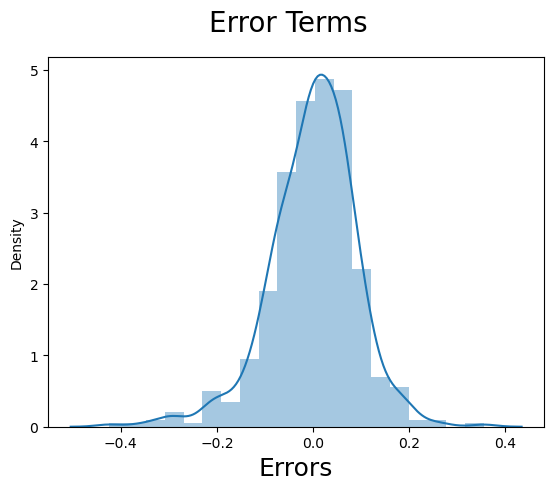

In [56]:
# Plot the distribution plot of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)
plt.show()

Error terms are following normal distribution

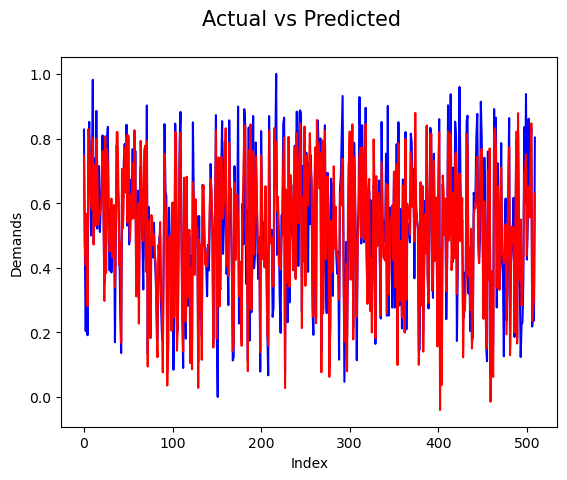

In [57]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

<br/>
<br/>

### <font color='darkgreen'>Making Predictions Using the Final Model</font>

In [58]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','count']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

year  holiday  workingday      temp     atemp  humidity  windspeed  \
184     0        1           0  0.831783  0.769660  0.657364   0.084219   
535     1        0           1  0.901354  0.842587  0.610133   0.153728   
299     0        0           1  0.511964  0.496145  0.837699   0.334206   
221     0        0           1  0.881625  0.795343  0.437098   0.339570   
152     0        0           1  0.817246  0.741471  0.314298   0.537414   

        count  aug  dec  ...  sun  thu  tue  wed  clear  light_snow_rain  \
184  0.692706    0    0  ...    0    0    0    0      0                0   
535  0.712034    0    0  ...    0    0    0    1      1                0   
299  0.303382    0    0  ...    0    1    0    0      0                0   
221  0.547400    1    0  ...    0    0    0    1      1                0   
152  0.569029    0    0  ...    0    1    0    0      1                0   

     mist  spring  summer  winter  
184     1       0       0       0  
535     0       0       1       0  
299     1       0       0       1  
221     0       0       0       0  
152     0       0       1       0  

[5 rows x 31 columns]

In [59]:
df_test.describe()

year     holiday  workingday        temp       atemp    humidity  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.700000    0.558718    0.532847    0.638221   
std      0.500809    0.187620    0.459303    0.233187    0.217401    0.148694   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.355429    0.344870    0.529197   
50%      0.000000    0.000000    1.000000    0.558172    0.544652    0.625590   
75%      1.000000    0.000000    1.000000    0.755981    0.713308    0.743798   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed       count         aug         dec  ...         sun  \
count  220.000000  220.000000  220.000000  220.000000  ...  220.000000   
mean     0.313293    0.522154    0.059091    0.086364  ...    0.145455   
std      0.159584    0.219163    0.236333    0.281541  ...    0.353363   
min     -0.042808    0.048205    0.000000    0.000000  ...    0.000000   
25%      0.198843    0.378595    0.000000    0.000000  ...    0.000000   
50%      0.300126    0.524678    0.000000    0.000000  ...    0.000000   
75%      0.402718    0.677750    0.000000    0.000000  ...    0.000000   
max      0.807474    0.963300    1.000000    1.000000  ...    1.000000   

              thu         tue         wed       clear  light_snow_rain  \
count  220.000000  220.000000  220.000000  220.000000       220.000000   
mean     0.163636    0.168182    0.100000    0.654545         0.027273   
std      0.370789    0.374881    0.300684    0.476601         0.163248   
min      0.000000    0.000000    0.000000    0.000000         0.000000   
25%      0.000000    0.000000    0.000000    0.000000         0.000000   
50%      0.000000    0.000000    0.000000    1.000000         0.000000   
75%      0.000000    0.000000    0.000000    1.000000         0.000000   
max      1.000000    1.000000    1.000000    1.000000         1.000000   

             mist      spring      summer      winter  
count  220.000000  220.000000  220.000000  220.000000  
mean     0.318182    0.254545    0.263636    0.236364  
std      0.466833    0.436599    0.441609    0.425817  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      1.000000    1.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 31 columns]

In [60]:
# creating X and y for test dataset
y_test = df_test.pop('count')
X_test = df_test

In [61]:
# Removing columns which are not there in model
X_test = X_test[X_train_selected.columns]

# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

In [62]:
#Predicting y values from X Testusing final model
y_test_pred = final_model.predict(X_test_lm)

In [63]:
r2 = r2_score(y_test, y_test_pred)
r2Score = round(r2,4)
display(Markdown("### R2 Score on Test Data "+ str(r2Score)))

### R2 Score on Test Data 0.804

<br/>
<br/>

### <font color='darkgreen'>Model Evaluation</font>

In [64]:
# Plotting y_test and y_pred to understand the spread

fig = px.scatter(df_bikeShare, x="atemp", y="count", title='y_test vs y_test_pred')
fig.show()

In [65]:
round(final_model.params,4)

const              0.2671
year               0.2350
holiday           -0.0972
temp               0.4316
windspeed         -0.1480
jan               -0.0431
july              -0.0694
sep                0.0583
light_snow_rain   -0.2867
mist              -0.0787
spring            -0.1027
winter             0.0408
dtype: float64

###### Here is the the equation of our best fitted line is:

`$ count = 0.2671 + 0.2350  \times  year - 0.0972  \times  holiday + 0.4316 \times temp - 0.1480 \times windspeed - 0.0431 \times jan - 0.0694 \times july + 0.0583 \times sep - 0.2867 \times light_snow_rain - 0.0787 \times mist - 0.1027 \times spring + 0.0408 \times winter $`

In [66]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
display(Markdown("### Adjusted-R^2 Score on Test Data "+ str(adjusted_r2)))

### Adjusted-R^2 Score on Test Data 0.7937

In [67]:
# Visualizing the fit on the test data
# plotting a Regression plot
fig = px.scatter(df_bikeShare, x="atemp", y="count", title='y_test vs y_test_pred',  trendline="ols")
fig.show()

<br/>
<br/>

### <font color='darkgreen'>Summary</font>

- Train dataset R^2          : 0.834
- Test dataset R^2           : 0.804
- Train dataset Adjusted R^2 : 0.830    
- Test dataset Adjusted R^2  : 0.794

##### Conclusion
Significant variables to predict the demand for shared bikes

- year
- holiday
- temperature
- windspeed
- Season(Winter, Spring)
- months(January, July, September)
- weathersit( Light Snow, Mist + Cloudy)

###### Analysing the above model, the comapany should focus on the following features:
- Company should focus on expanding business during Spring.
- Company should focus on expanding business during September.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.